In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt
from matplotlib import pyplot  as plt
from pyecharts.charts import HeatMap
from pyecharts import options as opts
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
np.set_printoptions(suppress=True)

In [4]:
# read in data
data = pd.read_excel('summary.xlsx')
data.head()

,账务流水号,业务流水号,商户订单号,商品名称,发生时间,对方账号,收入金额（+元）,支出金额（-元）,账户余额（元）,交易渠道,业务类型,备注
0,320903344085911,20200501110070001506910053216215\t,\t,\t,2020-05-01 00:26:44,支付宝(中国)网络技术有限公司(xs-***@alipay.com)\t,0.10,0.0,43838.24,支付宝,转账,公交赏金\t
1,320902547661911,20200501110070001506910053167189\t,\t,\t,2020-05-01 00:27:02,支付宝(中国)网络技术有限公司(xs-***@alipay.com)\t,0.10,0.0,43838.34,支付宝,转账,公交赏金\t
2,320903314247911,20200501110070001506910053222561\t,\t,\t,2020-05-01 00:28:51,支付宝(中国)网络技术有限公司(xs-***@alipay.com)\t,0.10,0.0,43838.44,支付宝,转账,公交赏金\t
3,320902951379911,20200501110070001506910053208575\t,\t,\t,2020-05-01 00:29:31,支付宝(中国)网络技术有限公司(xs-***@alipay.com)\t,0.16,0.0,43838.60,支付宝,转账,公交赏金\t
4,320903135625911,20200501110070001506910053163528\t,\t,\t,2020-05-01 00:29:37,支付宝(中国)网络技术有限公司(xs-***@alipay.com)\t,2.16,0.0,43840.76,支付宝,转账,公交赏金\t


In [ ]:
# renaming columns in English
index = [2,3,4,6,7,8,10,11]
data_sim = data.iloc[:,index]
new_col = ['orderID','productName','transactionTime','income','expense','balance','transactionType','remark']
data_sim.columns = new_col
data_sim.head()

In [ ]:
# add weekday field
data_sim['weekday'] = [i.strftime('%A') for i in data_sim.transactionTime]

### Cleaning Chinese content and slicing based on remarks type 

In [ ]:
# building pipeline for cleaning data
# encoding Chinese character and substract only the Chinese characters
# slice dataset based on remarks
data_sim['remark'] = [i.encode('utf-8') for i in data_sim.remark]
data_sim['transactionType'] = [i.encode('utf-8') for i in data_sim.transactionType]
data_sim['productName'] = [i.encode('utf-8') for i in data_sim.productName]

In [ ]:
def get_chinese(code):
    pattern="[\u4e00-\u9fa5]+"
    regex = re.compile(pattern) 
    result = regex.findall(code.decode())
    if result:
        return result
    else:
        return [None]
data_sim['remark'] = [get_chinese(i)[0]  for i in data_sim.remark]
data_sim['productName'] = [get_chinese(i)[0] for i in data_sim.productName]
data_sim['transactionType'] = [get_chinese(i)[0] for i in data_sim.transactionType]
# cols = ['remark','productName','transactionType']
# for col in cols:
#     data_sim[col] = [i[0] for i in data_sim[col]]
#data_sim['transactionType'] = [i[0] for i in data_sim.transactionType]

In [ ]:
data_sim.productName.unique()

In [ ]:
# splitting with remarks
names = ['公交赏金', '地铁赏金', '支付宝推荐奖励']
name2 = ['码上赏']
name3 = ['服务费']
mss = data_sim[data_sim['productName']== name2[0]]
# data_bus = data_sim[data_sim['remark'] == names[0]]
# data_metro = data_sim[data_sim['remark']==names[1]]
# data_recommend = data_sim[data_sim['remark']==names[2]]

In [ ]:
data_sim[data_sim['income']==-1.0]

In [ ]:
one_d = data_sim[(data_sim.expense==-1)&(data_sim['remark']==name3[0])]

In [ ]:
daily_expense = one_d.groupby(one_d.transactionTime.dt.date).agg(daily_expense = pd.NamedAgg('expense',aggfunc = 'sum'))

In [ ]:
# with ExcelWriter('daily_expense.xlsx') as writer:
#     daily_expense.to_excel(writer)

In [68]:
all_expense = data_sim[data_sim['expense']<0]

In [71]:
all_expense.expense.unique()

array([    -0.01,     -0.02,     -0.04, -39999.84,  -2804.  ,     -2.  ,
           -0.3 ,     -0.03,     -0.2 ,     -0.5 ,     -0.14,     -0.81,
           -0.27,     -1.  ,     -0.54,     -0.17,     -0.12,     -0.13,
        -2040.  , -61586.98,     -0.05,     -0.1 ,     -0.31,  -1654.  ,
       -41722.47,     -0.08])

In [18]:
dzp = mss.groupby(mss.transactionTime.dt.date).agg(daily_count = pd.NamedAgg('income',aggfunc = 'count'))

In [25]:
dzp = mss[mss['income'] ==2].groupby(mss.transactionTime.dt.date).agg(daily_count = pd.NamedAgg('income',aggfunc = 'count'))

In [27]:
dzp

,daily_count
transactionTime,
2020-05-01,29
2020-05-02,28
2020-05-03,19
2020-05-04,26
2020-05-05,24
...,...
2020-07-27,73
2020-07-28,72
2020-07-29,72


In [31]:
dzp.reset_index(inplace = True)

In [36]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

In [33]:
dzp

,transactionTime,daily_count
0,2020-05-01,29
1,2020-05-02,28
2,2020-05-03,19
3,2020-05-04,26
4,2020-05-05,24
...,...,...
74,2020-07-27,73
75,2020-07-28,72
76,2020-07-29,72
77,2020-07-30,65


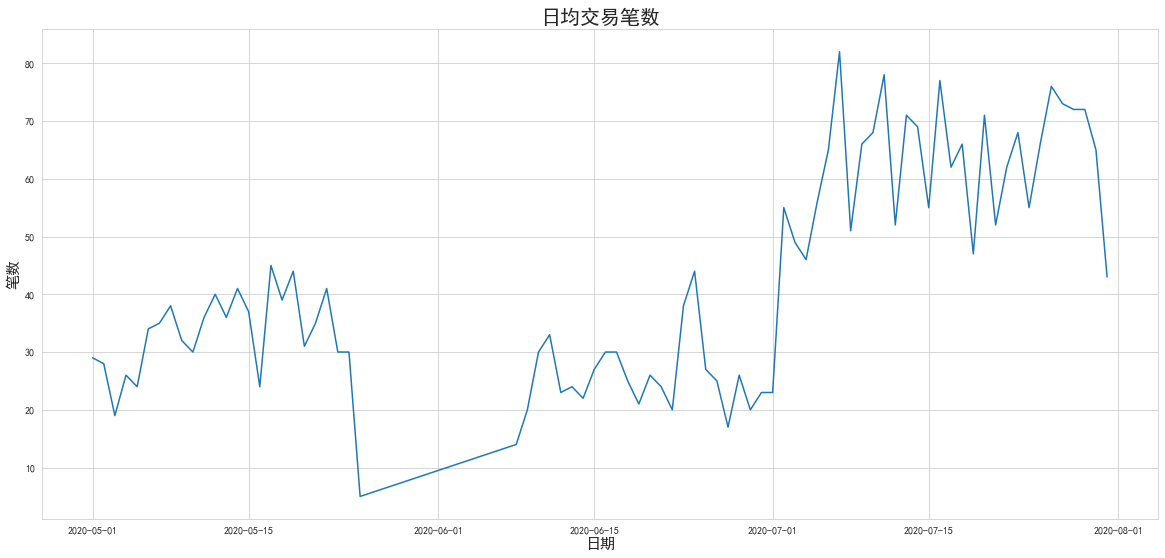

In [37]:
plt.figure(figsize=(20,9))
ax = sns.lineplot(data = dzp, x=dzp.transactionTime,y=dzp.daily_count)
plt.title("日均交易笔数", fontsize = 20) # for title
plt.xlabel("日期", fontsize = 15) # label for x-axis
plt.ylabel("笔数", fontsize = 15) # label for y-axis
#plt.xticks(np.arange(,24,1))
plt.show()

## 切割数据：根据业务类型

In [73]:
# group data by weekday and hours
def aggre_data(data,count=False):
    grouped = data.groupby(['weekday',data.transactionTime.dt.hour,data.transactionTime.dt.date])
    if count:
        aggre = grouped.agg(total_income=pd.NamedAgg(column='income', aggfunc='count'))
    else:
        aggre = grouped.agg(total_income=pd.NamedAgg(column='income', aggfunc='sum'))
    aggre.index.set_names(['weekday','hour','date'],inplace = True)
    aggre.reset_index(inplace = True)
    aggre = aggre.groupby(['weekday','hour']).agg(mean_count = pd.NamedAgg('total_income',aggfunc = 'mean'))
    aggre =  aggre.reset_index()
    return aggre

# generate pivot table for plotting
def pivot_data(aggre):
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    aggre.weekday = pd.Categorical(aggre.weekday,categories=weekdays)
    aggre = aggre.sort_values('weekday')
    aggre = aggre.pivot(index = 'hour', columns = 'weekday', values = 'mean_count')
    return aggre

In [74]:
test = aggre_data(old,count = True)

In [76]:
test_pivot = pivot_data(test)

In [77]:
data_bus=data_bus[['transactionTime','income','weekday']]

In [78]:
old,new = data_bus[data_bus.income<1], data_bus[data_bus.income>=1]

In [79]:
aggre_bus = aggre_data(data_bus, count=True)
pivot_bus = pivot_data(aggre_bus)
# old
aggre_old = aggre_data(old, count=True)
pivot_old = pivot_data(aggre_old)
# new
aggre_new = aggre_data(new, count=True)
pivot_new = pivot_data(aggre_new)
# aggre_metro = aggre_data(data_metro)
# pivot_metro = pivot_data(aggre_metro)
# aggre_recommend = aggre_data(data_recommend)
# pivot_recommend = pivot_data(aggre_recommend)

### 根据业务类型绘制热力图

In [80]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

In [81]:
# heatmap for aggregated income amount
def heatmap_weekhour(aggre,name,income):
    fig=plt.figure(figsize=(4,4),dpi=200)
    ax = sns.heatmap(aggre, vmin=min(income), vmax=max(income), 
                     annot=True,
                     annot_kws={'size':3, 'color':'blue'},
                     fmt='g',
                     linewidths=.5,                                 
                     cmap="summer_r",                               
                     xticklabels=aggre.columns, yticklabels=aggre.index)   
    #set title
    ax.set(title = name)

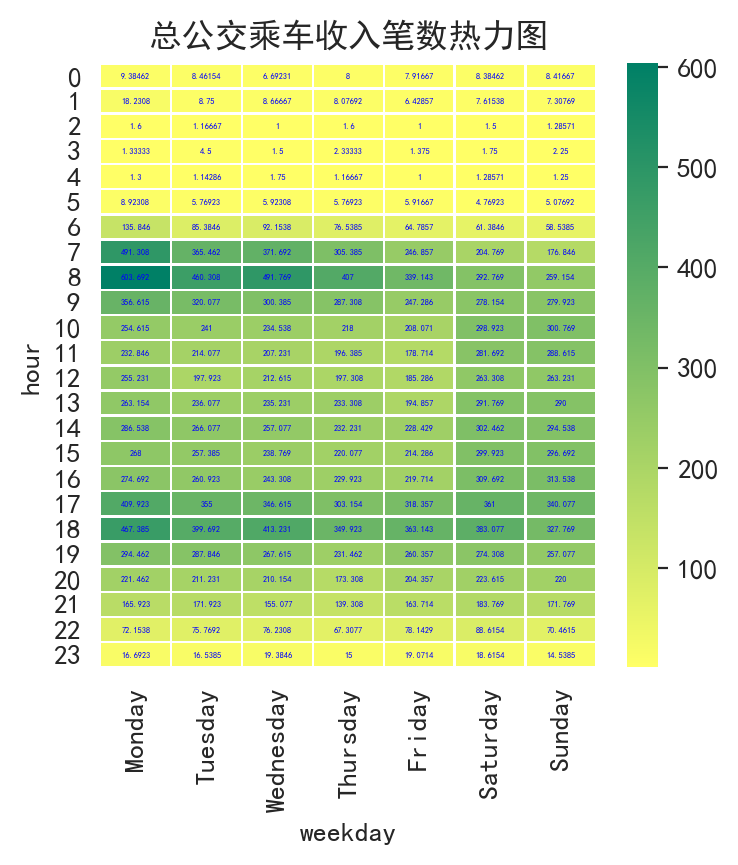

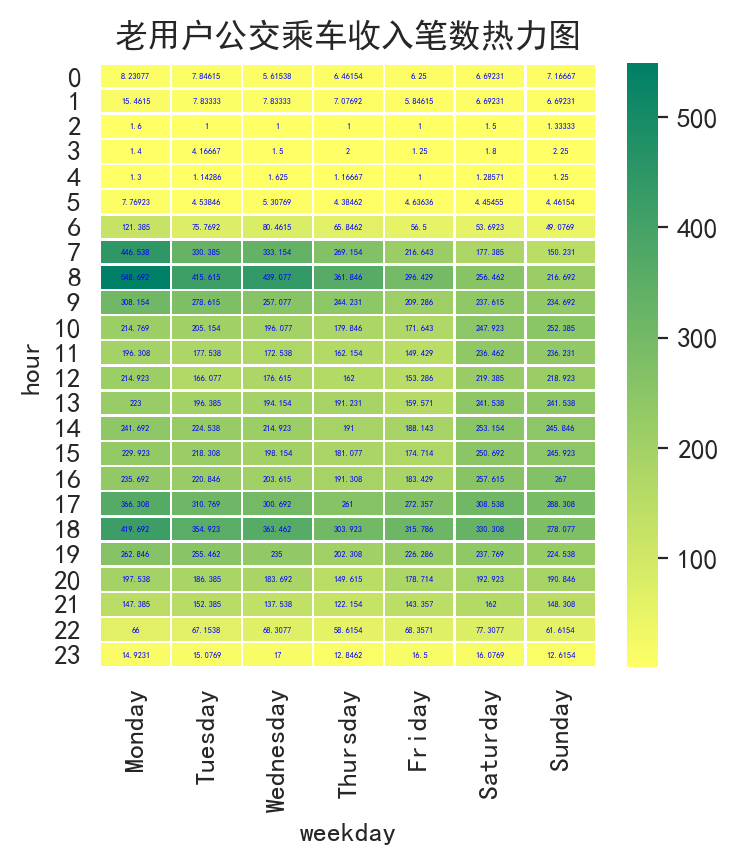

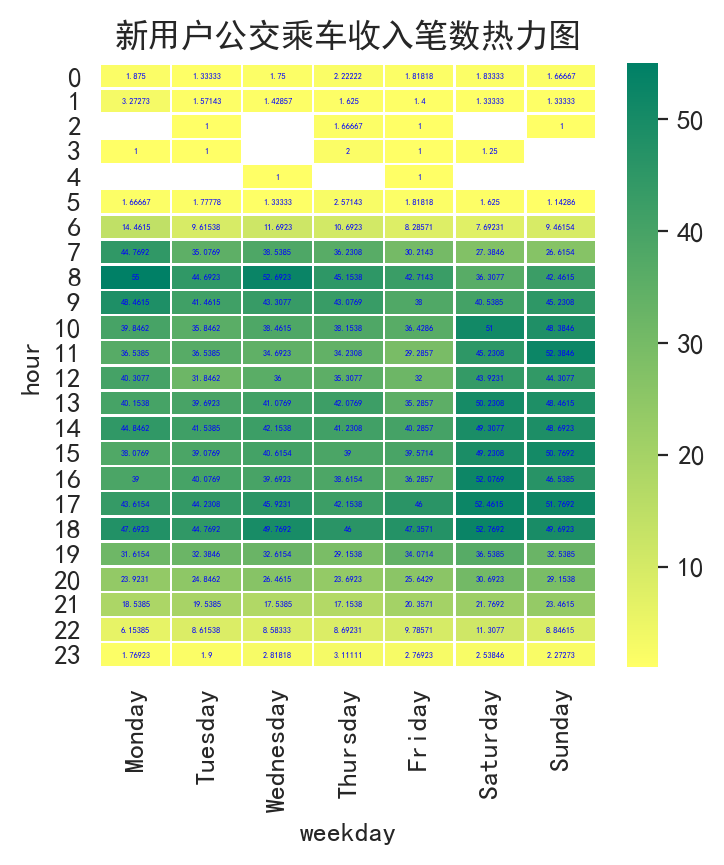

In [82]:
heatmap_weekhour(pivot_bus,'总公交乘车收入笔数热力图',aggre_bus['mean_count'])

heatmap_weekhour(pivot_old,'老用户公交乘车收入笔数热力图',aggre_old['mean_count'])

heatmap_weekhour(pivot_new,'新用户公交乘车收入笔数热力图',aggre_new['mean_count'])
#heatmap_weekhour(test_pivot,'总公交乘车时均收入笔数热力图',test_agg['mean_count'])
# heatmap_weekhour(pivot_metro,'Heatmap for metro revenue',aggre_metro['total_income'])
# heatmap_weekhour(pivot_recommend,'Heatmap for recommend revenue',aggre_recommend['total_income'])

### 根据时间切割数据：工作日周末/高峰期

In [58]:
#以公交乘车码数据为例，根据周末/工作日进行切割
data_weekend = data_bus[(data_bus['weekday']== 'Saturday')|(data_bus['weekday']== 'Sunday')]
data_weekday = data_bus[(data_bus['weekday']!= 'Saturday')&(data_bus['weekday']!= 'Sunday')]

In [62]:
from pandas import ExcelWriter

In [63]:
with ExcelWriter('data_weekend.xlsx') as writer:
    data_weekend.to_excel(writer)

NameError: name 'data_weekend' is not defined

In [277]:
with ExcelWriter('data_weekday.xlsx') as writer:
    data_weekday.to_excel(writer)

In [278]:
with ExcelWriter('data_bus.xlsx') as writer:
    data_bus.to_excel(writer)

## 以分钟为单位取和

### 使用推特方法监测异常值

In [17]:
import scipy as sp
import statsmodels.api as sm
import logging

In [18]:
import tad
from tad.anomaly_detect_ts import anomaly_detect_ts

In [99]:
#reformatting data for modeling
def reformat_anomaly(data):
    df = data[['transactionTime','income']]
    df['transactionTime'] = [dt.datetime.strptime(x.strftime('%Y-%m-%d:%H-%M'), '%Y-%m-%d:%H-%M') for x in df['transactionTime']]
    df =df.pivot_table(index='transactionTime',aggfunc='sum')
    ts = pd.Series(df['income'].values, index=df.index)
    return ts

In [177]:
def analyze_anomaly(anomaly1_wk):
    results2 = pd.DataFrame(anomaly1_wk['anoms'],columns = ['Income'])
    results2.reset_index(inplace = True)
    results2.columns = ['transactionTime','Income']
    results2_agg = results2.groupby(results2.transactionTime.dt.date)
    results2_agg = results2_agg.agg(anom_income = pd.NamedAgg(column = 'Income',aggfunc = 'count'))
    return results2_agg

In [217]:
#工作日数据建模modeling of weekdays data
ts1 = reformat_anomaly(data_weekday)
anomaly1_wd = anomaly_detect_ts(ts1, max_anoms=0.1, direction="pos", alpha=0.05, only_last=None,
                      threshold=None, e_value=False, longterm=False, piecewise_median_period_weeks=2,
                      plot=False, y_log=False, xlabel="", ylabel="count", title=None, verbose=False)
results1_wd = pd.DataFrame(anomaly1_wd['anoms'].index.sort_values())

In [292]:
results1_wd['weekday']=results1_wd.time.dt.weekday

In [321]:
results1_wd.reset_index(inplace = True)

In [328]:
results1_wd[results1_wd['time']>dt.datetime(2020,5,29,0,0)][results1_wd['time']<dt.datetime(2020,5,30,0,0)]

,index,time,weekday
111,111,2020-05-29 10:17:00,4
112,112,2020-05-29 12:09:00,4
113,113,2020-05-29 18:48:00,4


In [307]:
results1_wd.groupby([results1_wd.time.dt.hour]).agg(count=pd.NamedAgg(column = 'time',aggfunc = 'count'))

,count
time,
6,1
7,23
8,45
9,29
10,11
11,42
12,19
13,13
14,24


In [312]:
results1_wk.groupby([results1_wd.time.dt.hour]).agg(count=pd.NamedAgg(column = 'time',aggfunc = 'count'))

,count
time,
7,10
8,24
9,17
10,6
11,17
12,13
13,9
14,15
15,7


In [228]:
#探测出351个异常时间,其中45个集中在早上八点,103集中在周一,
#异常值出现最多的时间段是周一的早上7点和8点，均出现了16次异常值
#异常值出现最多的两天为7/6日和7/13日，均出现19次,这两天的异常时间没有明显分布规律
results1_wd.columns = ['time']

In [253]:
l1=[]
for x in results1_wd['time']:
    if x.strftime('%Y-%m-%d') == '2020-07-06':
        l.append(x)

In [252]:
l

[Timestamp('2020-07-06 07:18:00'),
 Timestamp('2020-07-06 07:52:00'),
 Timestamp('2020-07-06 07:53:00'),
 Timestamp('2020-07-06 07:54:00'),
 Timestamp('2020-07-06 07:58:00'),
 Timestamp('2020-07-06 08:01:00'),
 Timestamp('2020-07-06 08:08:00'),
 Timestamp('2020-07-06 08:22:00'),
 Timestamp('2020-07-06 09:01:00'),
 Timestamp('2020-07-06 09:50:00'),
 Timestamp('2020-07-06 11:12:00'),
 Timestamp('2020-07-06 11:55:00'),
 Timestamp('2020-07-06 13:30:00'),
 Timestamp('2020-07-06 13:47:00'),
 Timestamp('2020-07-06 14:39:00'),
 Timestamp('2020-07-06 15:29:00'),
 Timestamp('2020-07-06 16:13:00'),
 Timestamp('2020-07-06 16:14:00'),
 Timestamp('2020-07-06 16:49:00'),
 Timestamp('2020-07-06 07:18:00'),
 Timestamp('2020-07-06 07:52:00'),
 Timestamp('2020-07-06 07:53:00'),
 Timestamp('2020-07-06 07:54:00'),
 Timestamp('2020-07-06 07:58:00'),
 Timestamp('2020-07-06 08:01:00'),
 Timestamp('2020-07-06 08:08:00'),
 Timestamp('2020-07-06 08:22:00'),
 Timestamp('2020-07-06 09:01:00'),
 Timestamp('2020-07-

In [254]:
l=[]
for x in results1_wd['time']:
    if x.strftime('%Y-%m-%d') == '2020-07-13':
        l.append(x)

In [258]:
l

[Timestamp('2020-07-13 06:53:00'),
 Timestamp('2020-07-13 07:01:00'),
 Timestamp('2020-07-13 07:39:00'),
 Timestamp('2020-07-13 07:51:00'),
 Timestamp('2020-07-13 08:18:00'),
 Timestamp('2020-07-13 08:43:00'),
 Timestamp('2020-07-13 09:08:00'),
 Timestamp('2020-07-13 09:34:00'),
 Timestamp('2020-07-13 10:56:00'),
 Timestamp('2020-07-13 11:12:00'),
 Timestamp('2020-07-13 11:13:00'),
 Timestamp('2020-07-13 12:14:00'),
 Timestamp('2020-07-13 12:48:00'),
 Timestamp('2020-07-13 13:42:00'),
 Timestamp('2020-07-13 14:01:00'),
 Timestamp('2020-07-13 15:21:00'),
 Timestamp('2020-07-13 16:13:00'),
 Timestamp('2020-07-13 16:14:00'),
 Timestamp('2020-07-13 17:50:00')]

In [178]:
re = analyze_anomaly(anomaly1_wd)

In [220]:
re

,transactionTime,anom_income
0,2020-05-01,9
1,2020-05-04,4
2,2020-05-05,5
3,2020-05-06,4
4,2020-05-07,5
5,2020-05-08,5
6,2020-05-11,12
7,2020-05-12,4
8,2020-05-13,8
9,2020-05-14,7


In [289]:
ts2.index

DatetimeIndex(['2020-05-02 00:10:00', '2020-05-02 00:15:00',
               '2020-05-02 00:16:00', '2020-05-02 00:22:00',
               '2020-05-02 00:23:00', '2020-05-02 00:28:00',
               '2020-05-02 00:32:00', '2020-05-02 00:34:00',
               '2020-05-02 00:36:00', '2020-05-02 00:39:00',
               ...
               '2020-07-26 23:11:00', '2020-07-26 23:15:00',
               '2020-07-26 23:17:00', '2020-07-26 23:26:00',
               '2020-07-26 23:32:00', '2020-07-26 23:38:00',
               '2020-07-26 23:39:00', '2020-07-26 23:44:00',
               '2020-07-26 23:47:00', '2020-07-26 23:48:00'],
              dtype='datetime64[ns]', name='transactionTime', length=24879, freq=None)

In [174]:
#对周末数据进行建模 modeling of weekends data
ts2 = reformat_anomaly(data_weekend)
anomaly1_wk = anomaly_detect_ts(ts2, max_anoms=0.1, direction="pos", alpha=0.05, only_last=None,
                      threshold=None, e_value=False, longterm=False, piecewise_median_period_weeks=2,
                      plot=False, y_log=False, xlabel="", ylabel="count", title=None, verbose=False)


In [270]:
#探测结果有183个异常时间点,其中35个时间点出现在下午四点，96个出现在周六。
# 出现最多的时间段为周六下午四点（23次），次位为周日下午4点（12次），和周六早上10点、11点
# 异常最多的日期为2020-05-02，出现了25次异常,当天出现时间段无明显规律
anomaly1_wk['anoms']

2020-07-26 11:13:00    27.54
2020-07-25 16:12:00    26.26
2020-06-27 16:13:00    20.46
2020-07-05 16:05:00    20.88
2020-07-05 11:13:00    19.24
                       ...  
2020-05-30 14:25:00    10.22
2020-05-10 10:00:00     8.56
2020-05-17 16:16:00     8.68
2020-05-02 11:20:00     8.10
2020-07-12 15:12:00     8.76
Length: 183, dtype: float64

In [263]:
results1_wk = pd.DataFrame(anomaly1_wk['anoms'].index.sort_values())

In [266]:
k=[]
for x in results1_wk[0]:
    if x.strftime('%Y-%m-%d') == '2020-05-02':
        k.append(x)

In [268]:
k

[Timestamp('2020-05-02 07:27:00'),
 Timestamp('2020-05-02 10:06:00'),
 Timestamp('2020-05-02 10:14:00'),
 Timestamp('2020-05-02 10:19:00'),
 Timestamp('2020-05-02 10:37:00'),
 Timestamp('2020-05-02 11:20:00'),
 Timestamp('2020-05-02 11:21:00'),
 Timestamp('2020-05-02 12:25:00'),
 Timestamp('2020-05-02 12:27:00'),
 Timestamp('2020-05-02 13:26:00'),
 Timestamp('2020-05-02 13:39:00'),
 Timestamp('2020-05-02 13:43:00'),
 Timestamp('2020-05-02 14:05:00'),
 Timestamp('2020-05-02 14:06:00'),
 Timestamp('2020-05-02 14:20:00'),
 Timestamp('2020-05-02 14:30:00'),
 Timestamp('2020-05-02 15:10:00'),
 Timestamp('2020-05-02 15:52:00'),
 Timestamp('2020-05-02 16:07:00'),
 Timestamp('2020-05-02 16:22:00'),
 Timestamp('2020-05-02 16:37:00'),
 Timestamp('2020-05-02 16:46:00'),
 Timestamp('2020-05-02 16:52:00'),
 Timestamp('2020-05-02 17:39:00'),
 Timestamp('2020-05-02 18:21:00')]

### 小结
问题：在探测偏高值时表现优秀，在探测偏低的时间区段较弱（大多数据都是一分钟一笔，均值也较低）

## 以小时为单位取和

### 推特异常值检测算法

In [131]:
def reformat_hour(data):
    df = data[['transactionTime','income']]
    df['transactionTime'] = [dt.datetime.strptime(x.strftime('%Y-%m-%d:%H'), '%Y-%m-%d:%H') for x in df['transactionTime']]
    df =df.pivot_table(index='transactionTime',aggfunc='sum')
    ts = pd.Series(df['income'].values, index=df.index)
    return ts

# 工作日聚合数据1471条
# 周末聚合数据 581条

In [132]:
#工作日数据建模modeling of weekdays data
ts_wd = reformat_hour(data_weekday)
anomaly2_wd = anomaly_detect_ts(ts_wd, max_anoms=0.1, direction="pos", alpha=0.05, only_last=None,
                      threshold=None, e_value=False, longterm=False, piecewise_median_period_weeks=2,
                      plot=False, y_log=False, xlabel="", ylabel="count", title=None, verbose=False)
results2_wd = pd.DataFrame(anomaly2_wd['anoms'].index.sort_values())

In [133]:
anomaly2_wd
#一小时为单位检测出了两个异常时间，分别在5-18早上八点和5-19早上九点

{'anoms': 2020-05-19 09:00:00    302.58
 2020-05-18 08:00:00    293.70
 dtype: float64,
 'expected': None,
 'plot': None}

In [134]:
#周末数据建模 modeling of weekends data
ts_wk = reformat_hour(data_weekend)
anomaly2_wk = anomaly_detect_ts(ts_wk, max_anoms=0.1, direction="pos", alpha=0.05, only_last=None,
                      threshold=None, e_value=False, longterm=False, piecewise_median_period_weeks=2,
                      plot=False, y_log=False, xlabel="", ylabel="count", title=None, verbose=False)
results2_wk = pd.DataFrame(anomaly2_wk['anoms'].index.sort_values())

In [135]:
#以小时为单位的聚类周末建模数据量太少（581）推特算法探测不出异常值
anomaly2_wk

{'anoms': Series([], dtype: float64), 'plot': None}